Mounting Google Drive

In [117]:
from google.colab import drive 
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [151]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/drive/MyDrive/FP/calories.csv")
test = pd.read_csv("/content/drive/MyDrive/FP/exercise.csv")


In [152]:
test.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [153]:
train.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Exercise_Type,Calories
0,10001159,female,67,176,74,12,103,39.6,Cardio,76
1,10005485,female,38,178,77,14,82,40.5,Machine,49
2,10006441,male,23,169,73,25,102,40.7,Cardio,122
3,10007368,female,21,185,80,12,103,39.9,Machine,65
4,10008086,male,56,165,74,25,93,40.8,Cardio,129


In [154]:
train.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Exercise_Type', 'Calories'],
      dtype='object')

In [155]:
print (train.shape)
print(test.shape)

(4319, 10)
(15000, 8)


In [156]:
train.isnull().sum()

User_ID          0
Gender           0
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Exercise_Type    0
Calories         0
dtype: int64

<Axes: xlabel='Calories', ylabel='Count'>

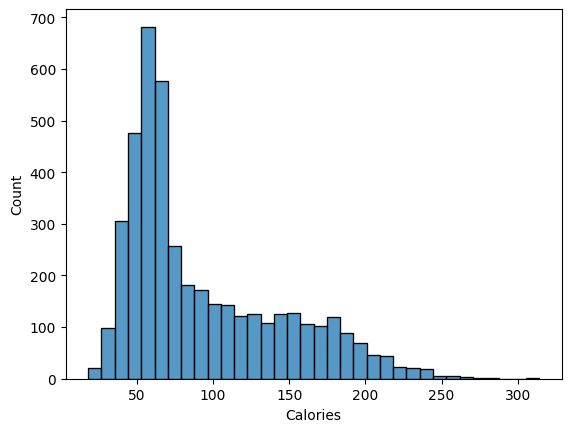

In [157]:
import seaborn as sns
sns.histplot(train['Calories'])

<Axes: xlabel='Calories', ylabel='Count'>

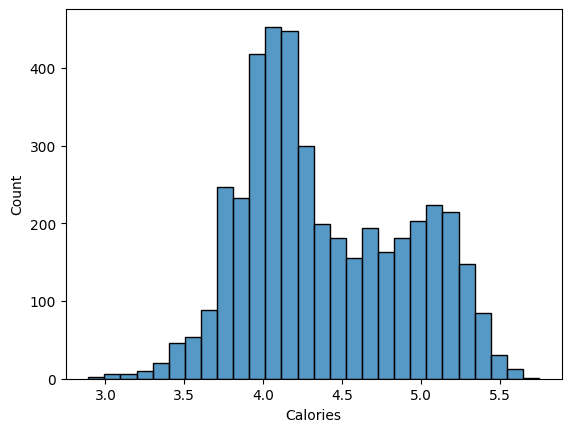

In [158]:
import numpy as np

target = np.log(train['Calories'])

sns.histplot(target)

In [159]:
#finding numerical features

numeric_data = train.select_dtypes(include = [np.number])


#catagorecal features

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))


there are 8 numerical and 2 catagorical featueres


<Axes: >

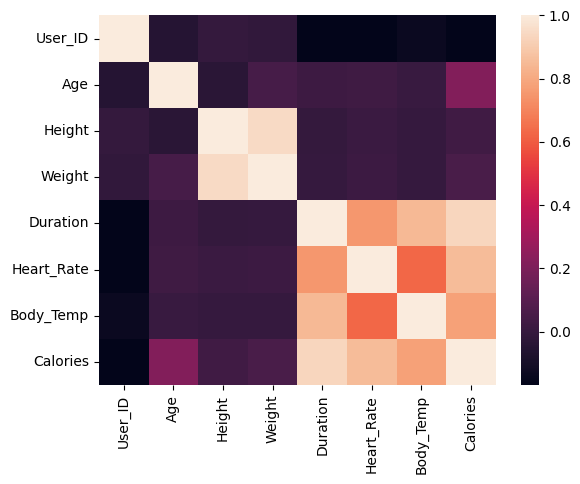

In [160]:
#numeric_data corelation plot

corr = numeric_data.corr()

#heatmap
sns.heatmap(corr)


In [161]:
train.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Exercise_Type', 'Calories'],
      dtype='object')

In [162]:
train.isnull().sum()

User_ID          0
Gender           0
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Exercise_Type    0
Calories         0
dtype: int64

In [163]:
#After coverting finding numerical feature

numeric_data = train.select_dtypes(include = [np.number])


#catagorical feature

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))


there are 8 numerical and 2 catagorical featueres


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


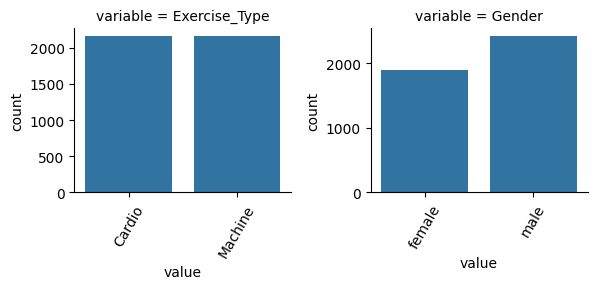

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

f = pd.melt(train, value_vars=sorted(catagorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False,sharey=False)
plt.xticks(rotation ='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [165]:
numeric_data = train.select_dtypes(include = [np.number])

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))

there are 8 numerical and 2 catagorical featueres


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


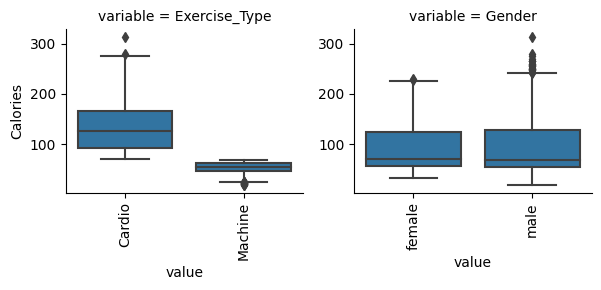

In [166]:
#box plot

f = pd.melt(train, id_vars=['Calories'], value_vars=sorted(catagorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value','Calories')
[plt.setp(ax.get_xticklabels(), rotation=90)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [167]:
train['Gender'] = pd.factorize(train.Gender)[0]
train['Exercise_Type'] = pd.factorize(train.Exercise_Type)[0]

In [168]:
train.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Exercise_Type,Calories
0,10001159,0,67,176,74,12,103,39.6,0,76
1,10005485,0,38,178,77,14,82,40.5,1,49
2,10006441,1,23,169,73,25,102,40.7,0,122
3,10007368,0,21,185,80,12,103,39.9,1,65
4,10008086,1,56,165,74,25,93,40.8,0,129


In [169]:
train.Calories.value_counts()*100/train.shape[0]

60     2.153276
62     1.968048
54     1.875434
57     1.852281
65     1.829127
         ...   
241    0.023154
224    0.023154
270    0.023154
280    0.023154
250    0.023154
Name: Calories, Length: 236, dtype: float64

In [170]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

features = train.drop(['Calories'], axis=1)
labels = train['Calories']

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=15421)

# Over Sampling
over_sampler = RandomOverSampler(random_state=544315)
x_over_samp, y_over_samp = over_sampler.fit_resample(x_train, y_train)

print(f"Before sampling: {len([i for i in y_train if i==1])}, {len([i for i in y_train if i==0])}")
print(f"After sampling: {len([i for i in y_over_samp if i==1])}, {len([i for i in y_over_samp if i==0])}")

Before sampling: 0, 0
After sampling: 0, 0


In [172]:
# Under Sampling
under_sampler = RandomUnderSampler(random_state=531212)
x_under_samp, y_under_samp = under_sampler.fit_resample(x_train, y_train)

print(f"Before sampling: {len([i for i in y_train if i==1])}, {len([i for i in y_train if i==0])}")
print(f"After sampling: {len([i for i in y_under_samp if i==1])}, {len([i for i in y_under_samp if i==0])}")

Before sampling: 0, 0
After sampling: 0, 0


In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier() #(n_estimators=500)

model_dt.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
print ("DT: {}, \nRF: {}".format (accuracy_score(y_test, y_pred_dt)*100,\
                                  accuracy_score(y_test, y_pred_rf)*100))

DT: 8.101851851851851, 
RF: 8.796296296296296


In [175]:
from sklearn.linear_model import LinearRegression
linerR = LinearRegression()
linerR.fit(x_train, y_train)


LinearRegression()

In [179]:
y = linerR.predict(x_test)
linerR.score(x_test,y_test)

0.9727330646914727

In [177]:
from google.colab import files
train.to_csv('train.csv') 
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
import pickle
pickle.dump(model_rf,open('/content/drive/MyDrive/FP/Calories.pkl', 'wb'))